# Assignment 6
### Multiple Regression

### Dataset

Course evaluations are used to obtain anonymous feedback about a course in order to improve it. However, the use of course evaluations as an indicator of course quality and teaching effectiveness is often criticized because these measures may reflect the influence of non-teaching related characteristics, such as the physical appearance of the instructor. [A paper from 2005](http://www.sciencedirect.com/science/article/pii/S0272775704001165) found that instructors who are viewed to be better looking receive higher instructional ratings.

In this practical we will have a look at this data, and perform multiple regression to see if there is any indication that this is true.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as ss

sns.set_style("whitegrid")

In [ ]:
courseEval = pd.read_csv('CourseEvaluations.csv')
courseEval.head()

,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
1,4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
2,3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
3,4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
4,4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,...,multi credit,4,4,2,2,3,3,3.0,not formal,color


### Beauty influencing score

The conclusion of the paper was that the perceived beauty of the lecturer has an influence on the score given in the course evaluations. First, we will create a simple model (linear regression) between `bty_avg` and `score`

## Exercise 1

1. Create a linear regression model of `bty_avg` predicting `score`. 
2. Plot the data with regression line.
3. Write down the obtained regression equation and the adjusted $R^{2}$ value.<div style="text-align: right"> **3 points** </div>

Question 1

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Tue, 27 May 2025   Prob (F-statistic):           5.08e-05
Time:                        06:29:46   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8803      0.076     50.

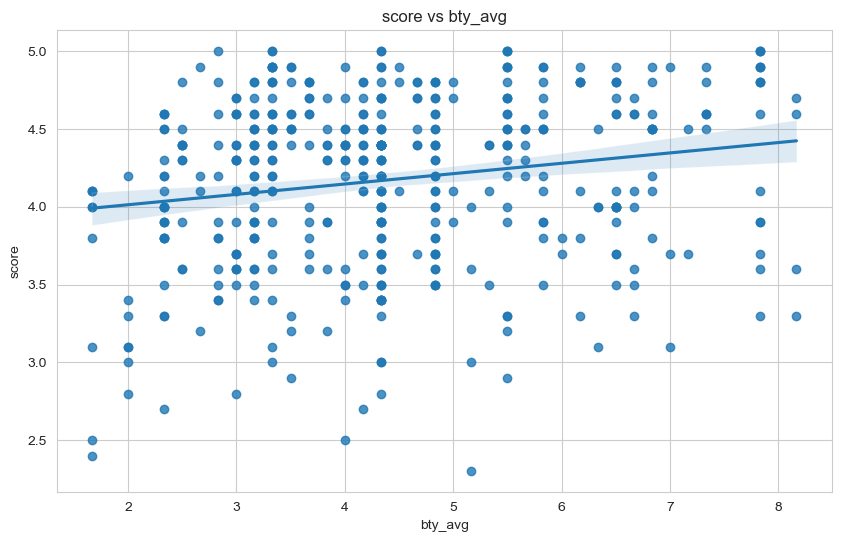

The regression equation is: score = 3.8803 + 0.0666 x bty_avg
The adjusted R^2 value is 0.0329
Question 3
0.06663703701981413
score = 3.8803379546077252 + 0.06663703701981413 × bty_avg

score = 3.8803379546077252 + 0.06663703701981413 * bty_avg

Adjusted R² = 0.03292903378612089


In [ ]:
# your code/answer here
# score is the dependent variable (response) and bty_avg is the independent (predictor)
def print_question(question_number, sep_line_width = 78):
    print(f"Question {question_number}")
    print(sep_line_width * "=")
    
print_question(1)
print("")
formula_string = "score ~ bty_avg"

model = sm.formula.ols(formula=formula_string, data=courseEval)
model_fitted = model.fit()

print(model_fitted.summary())

print_question(2)

plt.figure(figsize=(10, 6))
sns.regplot(data=courseEval, x='bty_avg', y='score')
plt.title('score vs bty_avg')
plt.show()

print(f"The regression equation is: score = {model_fitted.params['Intercept']:.4f} + {model_fitted.params['bty_avg']:.4f} x bty_avg")
print(f"The adjusted R^2 value is {model_fitted.rsquared_adj:.4f}")


print_question(3)


intercept_value = model_fitted.params['Intercept']
slope_value = model_fitted.params['bty_avg']


print(slope_value)

print(f"score = {intercept_value} + {slope_value} × bty_avg")
print()

print(f"score = {intercept_value} + {slope_value} * bty_avg")
print()

r_squared_adjusted = model_fitted.rsquared_adj


print(f"Adjusted R² = {r_squared_adjusted}")

### **Adding more variables and dummy coding**

More variables, other than `bty_avg`, can have an impact on the `score`. But instead of looking at these variables separately, we can create a multiple regression model with more than one explanatory variable. The next variable that we will add is `gender`.

The problem with the `gender` variable is that it is a nominal variable (male/female). In order to use this for regression we need to convert these levels into a numerical variable with the values 0 and 1, called an **indicator variable** (also refered to as a dummy variable).

In [ ]:
dummy_coding = {'male': 0, 'female': 1}
gender_dummy = courseEval['gender'].copy()
gender_dummy = gender_dummy.replace(dummy_coding)
courseEval['gender_dummy']=gender_dummy
courseEval.tail

C:\Users\kinos\AppData\Local\Temp\ipykernel_58708\4216482163.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gender_dummy = gender_dummy.replace(dummy_coding)


<bound method NDFrame.tail of      score          rank     ethnicity  gender     language  age  \
0      4.7  tenure track      minority  female      english   36   
1      4.1  tenure track      minority  female      english   36   
2      3.9  tenure track      minority  female      english   36   
3      4.8  tenure track      minority  female      english   36   
4      4.6       tenured  not minority    male      english   59   
..     ...           ...           ...     ...          ...  ...   
458    4.5  tenure track  not minority    male      english   32   
459    3.5  tenure track      minority  female  non-english   42   
460    4.4  tenure track      minority  female  non-english   42   
461    4.4  tenure track      minority  female  non-english   42   
462    4.1  tenure track      minority  female  non-english   42   

     cls_perc_eval  cls_did_eval  cls_students cls_level  ... bty_f1lower  \
0         55.81395            24            43     upper  ...           5   

## Exercise 2

Now, the dummy coding has been applied. 

1. Create and fit a model with `bty_avg` and `gender_dummy` predicting the `score` variable. (Hint: you can use the + sign in the formula string to add multiple explanatory variables to your model). 
2. Again, write down the formula and the adjusted $R^{2}$. 
3. Do you think the model with gender and perceived beauty is a better model than the model with beauty alone? Justify your answer.<div style="text-align: right"> **3 points** </div>

In [ ]:
# your code/answer here
print_question(1)

# print(courseEval['gender_dummy'].head(10))

# print("gender", courseEval['gender'].head(10).tolist())
# print("gender_dummy", courseEval['gender_dummy'].head(10).tolist())


# print(courseEval['gender_dummy'].value_counts())


formula_multiple = "score ~ bty_avg + gender_dummy"
print(formula_multiple)

multiple_model = sm.formula.ols(formula=formula_multiple, data=courseEval)


multiple_fitted = multiple_model.fit()

print(multiple_fitted.summary())

Question 1
score ~ bty_avg + gender_dummy
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.45
Date:                Tue, 27 May 2025   Prob (F-statistic):           8.18e-07
Time:                        06:29:47   Log-Likelihood:                -360.37
No. Observations:                 463   AIC:                             726.7
Df Residuals:                     460   BIC:                             739.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Interc

In [ ]:
print_question(2)

intercept2 = multiple_fitted.params['Intercept']
bty_coef2 = multiple_fitted.params['bty_avg']
gender_coef2 = multiple_fitted.params['gender_dummy']


print(f"score = {intercept2} + {bty_coef2} * bty_avg + {gender_coef2} * gender_dummy")


adj_r2_2 = multiple_fitted.rsquared_adj
print("Adjusted R^2:", adj_r2_2)

print("")
print_question(3)

print("Only Beauty, Adjusted R^2:    ",r_squared_adjusted)  

print("Beauty + Gender, Adjusted R^2:", adj_r2_2) 

print("It increased by:", (adj_r2_2 - r_squared_adjusted))
print("Meaning, adding gender_dummy to the model explains an additional 2.2% of variance in the score (after penalizing extra parameter)")


print(f"\nModels that add gender are slightly better than models that only look.")
print(f"Because the R² value has increased by {adj_r2_2 - r_squared_adjusted}.")
print(f"However, it is only in the range of slightly better models.")

Question 2
score = 3.9197277854128636 + 0.0741553729841086 * bty_avg + -0.17238954964602915 * gender_dummy
Adjusted R^2: 0.055032019860021486

Question 3
Only Beauty, Adjusted R^2:     0.03292903378612089
Beauty + Gender, Adjusted R^2: 0.055032019860021486
It increased by: 0.0221029860739006
Meaning, adding gender_dummy to the model explains an additional 2.2% of variance in the score (after penalizing extra parameter)

Models that add gender are slightly better than models that only look.
Because the R² value has increased by 0.0221029860739006.
However, it is only in the range of slightly better models.


## Exercise 3

1. Plot (in a scatterplot) `bty_avg` vs `score`, and draw 2 lines in them, one for `male` and one for the `female`. (Hint: first create two separate equations for males and females). Make sure the 2 groups and lines have different colors and add a legend so you know which color represents which group. 
2. If two professors had the same beauty score, did the `male` or `female` tend to have a higher score?<div style="text-align: right"> **5 points** </div>

Question 1
Len male: 268
Len Fem: 195
male score = 3.766550809406273 + 0.11026114255531877 * bty_avg
female score = 3.95005983923778 + 0.03064258776824325 * bty_avg


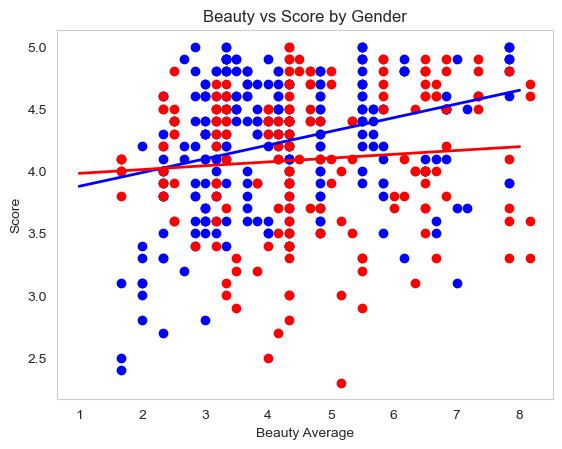

Question 2
male score = 3.766550809406273 + 0.11026114255531877 * bty_avg
female score = 3.95005983923778 + 0.03064258776824325 * bty_avg
male beauty score 3 = 0.05534663452971955
male beauty score 4 = 0.13496518931679535
male beauty score 5 = 0.21458374410387027
male beauty score 6 = 0.29420229889094607
male beauty score 7 = 0.37382085367802187
male tends to be higher score
0.21458374410387027

When comparing the scores of women and men when the appearance scores were the same
it was found that men had higher rating scores
beauuse the difference is about {0.21458374410387027} points


In [ ]:
# your code/answer here
print_question(1)
#male
male_data = courseEval[courseEval['gender_dummy'] == 0]
print("Len male:", len(male_data))

#female
female_data = courseEval[courseEval['gender_dummy'] == 1]
print("Len Fem:", len(female_data))


male_formula = "score ~ bty_avg"
male_model = sm.formula.ols(formula=male_formula, data=male_data)
male_fitted = male_model.fit()

male_intercept = male_fitted.params['Intercept']
male_slope = male_fitted.params['bty_avg']
print(f"male score = {male_intercept} + {male_slope} * bty_avg")


female_formula = "score ~ bty_avg"
female_model = sm.formula.ols(formula=female_formula, data=female_data)
female_fitted = female_model.fit()

female_intercept = female_fitted.params['Intercept']
female_slope = female_fitted.params['bty_avg']
print(f"female score = {female_intercept} + {female_slope} * bty_avg")



#male
plt.scatter(male_data['bty_avg'], male_data['score'], color='blue')

#female
plt.scatter(female_data['bty_avg'], female_data['score'], color='red')

x_values = range(1, 9) 

male_line_y = []
for x in x_values:
    y = male_intercept + male_slope * x
    male_line_y.append(y)

plt.plot(x_values, male_line_y, color='blue', linewidth=2, label='Male Line')
  
female_line_y = []
for x in x_values:
    y = female_intercept + female_slope * x
    female_line_y.append(y)

plt.plot(x_values, female_line_y, color='red', linewidth=2, label='Female Line')


plt.xlabel('Beauty Average')
plt.ylabel('Score')
plt.title('Beauty vs Score by Gender')

plt.grid()
plt.show()

print_question(2)

#male
print(f"male score = {male_intercept} + {male_slope} * bty_avg")
#female
print(f"female score = {female_intercept} + {female_slope} * bty_avg")


beauty_scores = [3, 4, 5, 6, 7]


for beauty in beauty_scores:

    male_score = male_intercept + male_slope * beauty
    female_score = female_intercept + female_slope * beauty
    
    #print(beauty)
    #print(male_score)
    #print(female_score)
    
    if female_score > male_score:
        print(f"female beauty score {beauty} = {female_score - male_score}")
    else:
        print(f"male beauty score {beauty} = {male_score - female_score}")


test_beauty = 5
male_test = male_intercept + male_slope * test_beauty
female_test = female_intercept + female_slope * test_beauty

if female_test > male_test:
    print("female tends to be higher score")
    print(f"{female_test - male_test}")
else:
    print("male tends to be higher score")
    print(f"{male_test - female_test}")

print()
print("When comparing the scores of women and men when the appearance scores were the same")
print("it was found that men had higher rating scores")
print(f"beauuse the difference is about", {male_test - female_test}, "points")

## Exercise 4
P-values and parameter estimates should only be trusted if the conditions for the regression are reasonable. Verify that the conditions for this model are reasonable using diagnostic plots. To check the model conditions you will need to make the following plots (see page 271 of the book for more details about assumptions and example plots): 
1. scatterplot of the (absolute value) residuals (y-axis) against the predicted values (x-axis)
2. a histogram and QQ-plot of the residuals
3. scatterplot of the residuals (y-axis) against the order of collection (x-axis) 
4. scatterplots of the residuals (y-axis) against each of the explanatory variables (x-axis)

Make sure you use subplots (plt.subplot) to order these plots in a structured  manner. All plots must have a title and labels for the x and y-axis.

5. For each of the plots, describe whether the assumptions of multiple regression are met, or not.<div style="text-align: right"> **9 points** </div>

Question 1
0    4.118115
1    4.118115
2    4.118115
3    4.118115
4    4.142194
5    4.142194
6    4.142194
7    4.166888
8    4.166888
9    3.982188
dtype: float64
0    0.581885
1   -0.018115
2   -0.218115
3    0.681885
4    0.457806
5    0.157806
6   -1.342194
7   -0.066888
8   -0.766888
9    0.517812
dtype: float64
0    0.581885
1    0.018115
2    0.218115
3    0.681885
4    0.457806
5    0.157806
6    1.342194
7    0.066888
8    0.766888
9    0.517812
dtype: float64


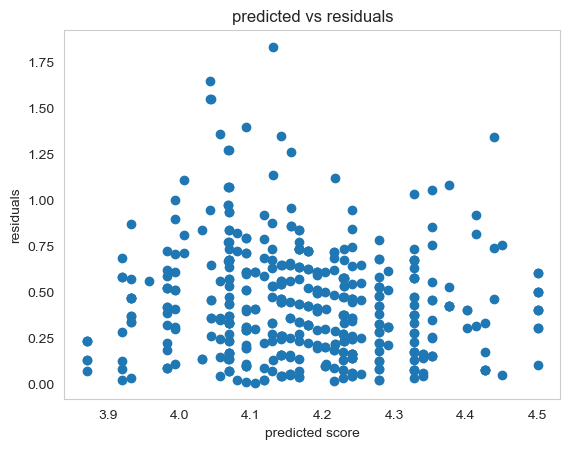

Question 2
0    0.581885
1   -0.018115
2   -0.218115
3    0.681885
4    0.457806
dtype: float64


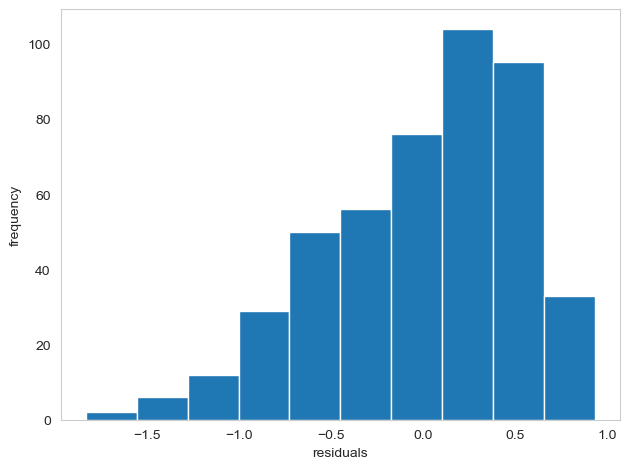

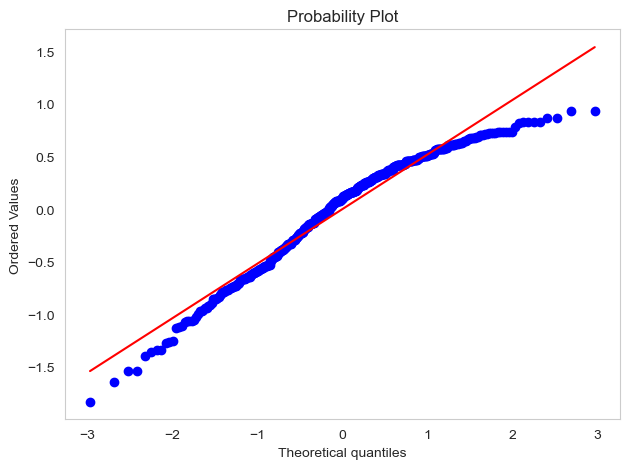

Question 3
463
462


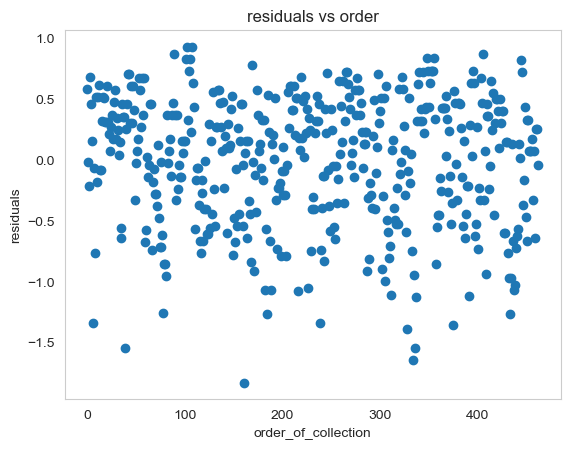

Question 4


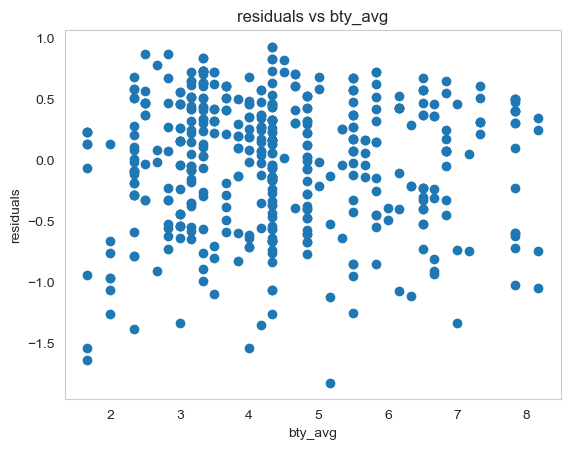

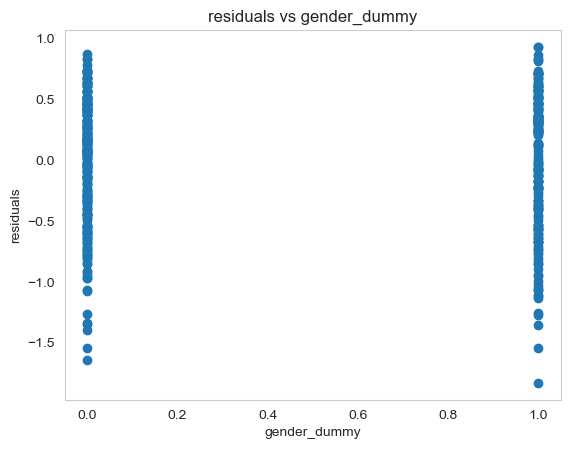

Question 5
For Residuals vs. predictions, The dots appear rather scattered.
There is also a feeling that the dots are a little clustered at the bottom, so maybe it's not completely random.

For Histogram of residuals,It is high in the middle and low at both ends 
with a bell-curve-like shape, but slightly biased to the right.

For QQ plot, 
The dots were roughly in line with the lines, so the regularity is probably OK.
But the edges are a bit crooked.

For Residuals vs order of collection, 
They were scattered discretely up and down and no distinctive patterns (like rightward direction) were visible
The dots seem to be slightly concentrated on the upper side.

Residuals vs. explanatory variables (bty_avg and gender_dummy),
ty_avg is scattered, with no distinctive pattern.
The gender_dummy is just a complete split of points into 0s and 1s.



In [ ]:
# your code/answer here
print_question(1)
import matplotlib.pyplot as plt

predicted = multiple_fitted.fittedvalues  
residuals = multiple_fitted.resid        


abs_residuals = abs(residuals)


print(predicted.head(10))
print(residuals.head(10))


print(abs_residuals.head(10))


plt.scatter(predicted, abs_residuals)

plt.xlabel("predicted score")
plt.ylabel("residuals")
plt.title("predicted vs residuals")

plt.grid()
plt.show()


print_question(2)
from scipy.stats import probplot

print(residuals.head())

#histogram 
plt.hist(residuals)
plt.xlabel("residuals")
plt.ylabel("frequency")
plt.grid()
plt.tight_layout() 
plt.show()


#QQ-plot

probplot(residuals, dist="norm", plot=plt)

plt.grid()

plt.tight_layout() 
plt.show()

print_question(3)


order_of_collection = range(len(residuals))
print(f"{len(residuals)}")
print(f"{len(residuals)-1}")

plt.scatter(order_of_collection, residuals)
plt.xlabel("order_of_collection")
plt.ylabel("residuals")
plt.title("residuals vs order")
plt.grid()

plt.show()

print_question(4)

# bty_avg vs residuals
plt.scatter(courseEval['bty_avg'], residuals)
plt.xlabel("bty_avg")
plt.ylabel("residuals")
plt.title("residuals vs bty_avg")
plt.grid()
plt.show()


# gender_dummy vs residuals  

plt.scatter(courseEval['gender_dummy'], residuals)
plt.xlabel("gender_dummy")
plt.ylabel("residuals")
plt.title("residuals vs gender_dummy")
plt.grid()
plt.show()

print_question(5)

print("For Residuals vs. predictions, The dots appear rather scattered.")
print("There is also a feeling that the dots are a little clustered at the bottom, so maybe it's not completely random.")
print()
print("For Histogram of residuals,It is high in the middle and low at both ends ")
print("with a bell-curve-like shape, but slightly biased to the right.")
print()
print("For QQ plot, ")
print("The dots were roughly in line with the lines, so the regularity is probably OK.")
print("But the edges are a bit crooked.")
print()

print("For Residuals vs order of collection, ")
print("They were scattered discretely up and down and no distinctive patterns (like rightward direction) were visible")
print("The dots seem to be slightly concentrated on the upper side.")
print()

print("Residuals vs. explanatory variables (bty_avg and gender_dummy),")
print("ty_avg is scattered, with no distinctive pattern.")
print("The gender_dummy is just a complete split of points into 0s and 1s.")
print()


### The search for the best model 
Now we will incorporate more predictors into the regression model. We will start with a full model that predicts professor score based on  ethnicity, gender, language of the university where they got their degree (language), age, proportion of students that filled out evaluations (cls_perc_eval), class size (cls_students), course level (cls_level), number of professors (cls_profs), number of credits (cls_credits), average beauty rating (bty_avg), outfit (pic_outfit), and picture color (pic_color).

In [ ]:
m_full = sm.formula.ols(formula = 'score ~ ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_profs + cls_credits + bty_avg + pic_outfit + pic_color', data = courseEval)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     8.264
Date:                Tue, 27 May 2025   Prob (F-statistic):           3.79e-14
Time:                        06:29:48   Log-Likelihood:                -328.37
No. Observations:                 463   AIC:                             682.7
Df Residuals:                     450   BIC:                             736.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## Exercise 5
Interpret the coefficient associated with the ethnicity variable.<div style="text-align: right"> **2 points** </div>

In [ ]:
print_question(1)

m = sm.formula.ols(formula='score ~ ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_profs + cls_credits + bty_avg + pic_outfit + pic_color', data=courseEval)
fitted_model = m.fit()


print(fitted_model.summary())

print(fitted_model.params)

for name in fitted_model.params.index:
    if 'ethnicity' in name:
        print(f"name is {name}")


ethnicity_coef = fitted_model.params['ethnicity[T.not minority]']
print(f"ethnicity[T.not minority] = {ethnicity_coef}")


print(courseEval['ethnicity'].unique())

print_question(2)
print(f"Non-minority teachers rated {ethnicity_coef} points higher than minority teachers")
print("but this difference may be coincidental (it is not a clear difference).")

Question 1
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     8.264
Date:                Tue, 27 May 2025   Prob (F-statistic):           3.79e-14
Time:                        06:29:48   Log-Likelihood:                -328.37
No. Observations:                 463   AIC:                             682.7
Df Residuals:                     450   BIC:                             736.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept  

## Exercise 6
One of the things that makes multiple regression interesting, but also difficult, is that coefficient estimates depend on the other variables that are included in the model.

1. Drop the variable with the largest p-value and re-fit the model. 
2. Did the coefficients and significance of the other explanatory variables change?  
3. What happened to `ethnicity`? Describe and interpret your observations in terms of collinearity with the other explanatory variables.<div style="text-align: right"> **3 points** </div>

In [ ]:
# your code/answer here
print_question(1)
full_formula = ("score ~ ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_credits + bty_avg + pic_outfit + pic_color + cls_profs ")

full_mod  = sm.formula.ols(full_formula, data=courseEval).fit()
print(full_mod.summary())


worst_variable = full_mod.pvalues.idxmax()
print("Worst p-Value: ", worst_variable, "\n")

excluding_worst = ("score ~ ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_credits + bty_avg + pic_outfit + pic_color")
excluding_worst_mod  = sm.formula.ols(excluding_worst, data=courseEval).fit()
print(excluding_worst_mod.summary())

Question 1
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     8.264
Date:                Tue, 27 May 2025   Prob (F-statistic):           3.79e-14
Time:                        06:29:48   Log-Likelihood:                -328.37
No. Observations:                 463   AIC:                             682.7
Df Residuals:                     450   BIC:                             736.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept  

In [ ]:
print_question(2)
for var in full_mod.params.index:
    if var in excluding_worst_mod.params.index: # check if the variable is also included in the second
        diff = full_mod.params[var] - excluding_worst_mod.params[var] # calc the difference
        print(f"{var:<30} difference = {diff:>6.4f}") # :<x and :>x to left and right align in x wide space

print(50*"-")
for var in full_mod.params.index:
    if var in excluding_worst_mod.params.index: 
        p_diff = full_mod.pvalues[var] - excluding_worst_mod.pvalues[var]
        print(f"{var:<30} difference = {p_diff:>6.4f}") 

print("\nThere are some differences, but they are very small. The highest difference I can observe is -0.0045 for the coefficients and 0.0211 for the p-values.\nThe minor shifts suggest that removing the variable had a small effect on the estimates or significances.")

Question 2
Intercept                      difference = 0.0083
ethnicity[T.not minority]      difference = -0.0041
gender[T.male]                 difference = 0.0008
language[T.non-english]        difference = -0.0015
cls_level[T.upper]             difference = -0.0001
cls_credits[T.one credit]      difference = -0.0042
pic_outfit[T.not formal]       difference = -0.0045
pic_color[T.color]             difference = 0.0018
age                            difference = -0.0000
cls_perc_eval                  difference = 0.0000
cls_students                   difference = -0.0000
bty_avg                        difference = 0.0002
--------------------------------------------------
Intercept                      difference = 0.0000
ethnicity[T.not minority]      difference = 0.0105
gender[T.male]                 difference = -0.0000
language[T.non-english]        difference = -0.0005
cls_level[T.upper]             difference = 0.0016
cls_credits[T.one credit]      difference = 0.0000
pic_outfit[

In [ ]:
print("Ethnicity remained statistically insignificant and it only had a small difference in coef (-0.0041) and p-value (+0.0105).\n"
      "So we can conclude that it wasn't sharing much with the dropped variable -> ethnicity wasn't strongly entangled with cls_profs.")

Ethnicity remained statistically insignificant and it only had a small difference in coef (-0.0041) and p-value (+0.0105).
So we can conclude that it wasn't sharing much with the dropped variable -> ethnicity wasn't strongly entangled with cls_profs.


## Exercise 7
Using backward-selection and p-value as the selection criterion, determine the best model. 
1. Describe the order in which you removed predictor variables.
2. Show the output for the final model. <div style="text-align: right"> **2 points** </div>

In [ ]:
# your code/answer here
current_predictors = ['ethnicity','gender','language','age','cls_perc_eval','cls_students', 'cls_level','cls_profs','cls_credits','bty_avg','pic_outfit','pic_color']
removed = []

while True:
    formula = 'score ~ ' + ' + '.join(current_predictors)
    print(formula)
    model = sm.formula.ols(formula=formula, data=courseEval).fit()
    pvals = model.pvalues.drop('Intercept') #drop intercept, might interfere
    worst_term = pvals.idxmax() # get the worst term
    if pvals[worst_term] <= 0.05: # if the p value is below 0.05, meaning that it significant, break the loop
        break
    # print(worst_term) # anoyingly it has the [...] stuff in there
    worst_var = worst_term.split('[')[0] # split at "[" and take the first element
    # print(worst_var)
    current_predictors.remove(worst_var) # remove the worst
    removed.append(worst_var) # add to the removed list

print("\nOrder of variables removed:", removed)
print("\nFinal model:")
print(model.summary())

score ~ ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_profs + cls_credits + bty_avg + pic_outfit + pic_color
score ~ ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_credits + bty_avg + pic_outfit + pic_color
score ~ ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_credits + bty_avg + pic_outfit + pic_color
score ~ ethnicity + gender + language + age + cls_perc_eval + cls_credits + bty_avg + pic_outfit + pic_color
score ~ ethnicity + gender + language + age + cls_perc_eval + cls_credits + bty_avg + pic_color

Order of variables removed: ['cls_profs', 'cls_level', 'cls_students', 'pic_outfit']

Final model:
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statisti

## Exercise 8
Verify that the conditions for this reduced, final model are reasonable using diagnostic plots.
To get the predicted values for a regression model, you can use the *predict* function in your regression model object, so for the example above question 5 that would be: `predicted_value = multi_reg.predict()`. Make sure you use subplots to order the diagnostic plots in a structured  manner.<div style="text-align: right"> **5 points** </div>

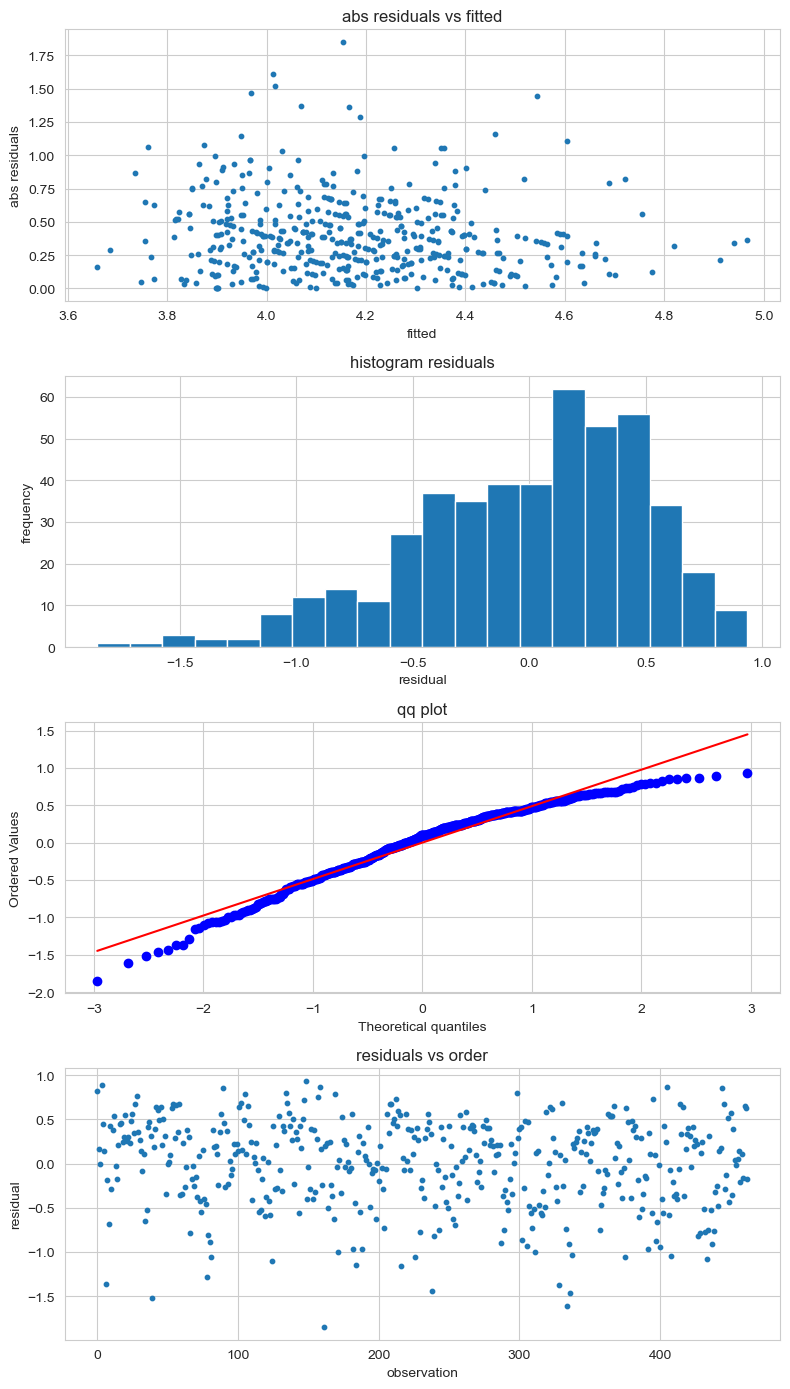

<Figure size 640x480 with 0 Axes>

Abs residuals vs fitted doesn't have a funnel or megaphone shape so it seems to be linear with constant variance
The histogram has a negative skew
The qq plot also the negative skew in the histogram
Looks like random scatter around 0 without significant drift


In [ ]:
# your code/answer here
residuals = model.resid # diff in prediction and observation
fitted    = model.predict()
abs_res   = np.abs(residuals) # convert to abs

# 2×3 grid
fig, axs = plt.subplots(4, figsize=(8, 14))


axs[0].scatter(fitted, abs_res, s=10)
axs[0].set_title('abs residuals vs fitted')
axs[0].set_xlabel('fitted')
axs[0].set_ylabel('abs residuals')


axs[1].hist(residuals, bins=20)
axs[1].set_title('histogram residuals')
axs[1].set_xlabel('residual')
axs[1].set_ylabel('frequency')



ss.probplot(residuals, dist="norm", plot=axs[2])
axs[2].set_title('qq plot')


axs[3].scatter(range(len(residuals)), residuals, s=10)
axs[3].set_title('residuals vs order')
axs[3].set_xlabel('observation')
axs[3].set_ylabel('residual')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

print("Abs residuals vs fitted doesn't have a funnel or megaphone shape so it seems to be linear with constant variance")
print("The histogram has a negative skew")
print("The qq plot also the negative skew in the histogram")
print("Looks like random scatter around 0 without significant drift")

## Exercise 9
In Exercises 4 and 8, we looked at residuals through histograms and probability plotes, and we were wondering if they are actually normally distributed. In both cases we were unsure whether the residuals may deviate too much from normality. Non-normality of residuals is not a problem *per se* for linear regression but it can be problematic for inference (i.e., deriving and interpreting p-values). Several formal tests exist that can tell us whether residuals are normally distributed, or not. One such test is the Shapiro-Wilk test, another one is the Kolmogorov-Smirnov test.

1. Run the Shapiro-Wilk test from `scipy.stats` on the residuals from the previous exercise.
2. Are the residuals normally distributed according to this test? Interpret the test output.<div style="text-align: right"> **2 points** </div>

In [ ]:
W, p_value = ss.shapiro(residuals)
print(f"Shapiro–Wilk test: W = {W:.4f}, p-value = {p_value:.4f}")


print("No, they are not normally distributed because the p-value is below 0.05")

Shapiro–Wilk test: W = 0.9641, p-value = 0.0000
No, they are not normally distributed because the p-value is below 0.05


## Exercise 10
1. Based on your final model, describe the characteristics of a professor and course at University of Texas at Austin that would be associated with a high evaluation score. 
2. Would you be comfortable generalizing your conclusions to apply to professors generally (at any university)? Justify your answer.<div style="text-align: right"> **2 points** </div>

In [ ]:
print_question(1)
print("Based on the model, ")
print("It is possible to consider that a professor who is likely to have a high evaluation score at the University of Texas at Austin is ")
print("someone who is not a minority, is male, speaks English, teaches a one-credit class, has a black and white profile picture, is younger, has many students giving evaluations, and is also good-looking.")
print()
print_question(2)
print("I wouldn't feel comfortable generalizing these results to other universities.")
print("This is because this analysis is based on data from one particular university, one particular region and one particular time period.")
print("Other universities may have very different cultures, grading systems, student expectations, aesthetic standards and so on")

Question 1
Based on the model, 
It is possible to consider that a professor who is likely to have a high evaluation score at the University of Texas at Austin is 
someone who is not a minority, is male, speaks English, teaches a one-credit class, has a black and white profile picture, is younger, has many students giving evaluations, and is also good-looking.
Question 2
I wouldn't feel comfortable generalizing these results to other universities.
This is because this analysis is based on data from one particular university, one particular region and one particular time period.
Other universities may have very different cultures, grading systems, student expectations, aesthetic standards and so on


Characteristics:
- Not minority ethnicity
- Male
- English speaking
- Teaches a one credit course
- Uses a non color profile picture
- Young
- Teaches a class where many students submitted a evaluation
- And has a high beauty score

I would not be comfortable generalizing my conclusions. It is only one specific university in one specific region during one specific time. Beauty ideals could change, grading policies might differ,...

**Total number of points**: 36